In [1]:
#!pip install pytest-warnings
import warnings
warnings.filterwarnings('ignore')

 # 1. Data Understanding and Exploration

In [2]:
#import libraries
import pandas as pd
import numpy as np

In [3]:
#Reading the dataset
dataset = pd.read_csv("Bikedata.csv")

In [4]:
dataset.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2011,1,0,1,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,01-01-2011,1,0,1,1,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,01-01-2011,1,0,1,2,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,01-01-2011,1,0,1,3,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,01-01-2011,1,0,1,4,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
dataset.shape

(17379, 16)

In [6]:
dataset.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [7]:
dataset.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   holiday     17379 non-null  int64  
 6   weekday     17379 non-null  int64  
 7   workingday  17379 non-null  int64  
 8   weathersit  17379 non-null  int64  
 9   temp        17379 non-null  float64
 10  atemp       17379 non-null  float64
 11  hum         17379 non-null  float64
 12  windspeed   17379 non-null  float64
 13  casual      17379 non-null  int64  
 14  registered  17379 non-null  int64  
 15  cnt         17379 non-null  int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 2.1+ MB


In [9]:
#Assigning string values to different seasons instead of numeric values

# 1 = spring
dataset.loc[(dataset['season'] == 1),'seasons'] = 'spring'

# 2 = summer
dataset.loc[(dataset['season'] == 2),'seasons'] = 'summer'

# 3 = fall 
dataset.loc[(dataset['season'] == 3),'seasons'] = 'fall'

# 4 = winter
dataset.loc[(dataset['season'] == 4),'seasons'] = 'winter'



In [10]:
dataset['season'].astype('category').value_counts()

3    4496
2    4409
1    4242
4    4232
Name: season, dtype: int64

In [11]:
# 0 = 2018, 1 =  2019 : year
dataset['yr'].astype('category').value_counts()

1    8734
0    8645
Name: yr, dtype: int64

In [12]:
#Assigning string values to different months instead of numeric values
def object_map_mnths(x):
    return x.map({1: 'Jan',2: 'Feb',3: 'Mar',4: 'Apr',5: 'May',6: 'Jun',7: 'Jul',8: 'Aug',9: 'Sept',10: 'Oct',11: 'Nov',12: 'Dec'})

In [13]:
dataset[['mnth']] = dataset[['mnth']].apply(object_map_mnths)

In [14]:
dataset['mnth'].astype('category').value_counts()

Jul     1488
May     1488
Dec     1483
Aug     1475
Mar     1473
Oct     1451
Jun     1440
Apr     1437
Nov     1437
Sept    1437
Jan     1429
Feb     1341
Name: mnth, dtype: int64

In [15]:
dataset['holiday'].astype('category').value_counts()

17    730
16    730
13    729
15    729
14    729
12    728
22    728
21    728
20    728
19    728
18    728
23    728
11    727
10    727
9     727
8     727
7     727
0     726
6     725
1     724
5     717
2     715
4     697
3     697
Name: holiday, dtype: int64

In [16]:
def str_map_weekday(x):
    return x.map({1: 'Mon', 2: 'Tues', 3: 'Wed' , 4: 'Thurs', 5: 'Fri', 6: 'sat', 0: 'sun'})

In [17]:
dataset[['weekday']] = dataset[['weekday']].apply(str_map_weekday)

In [18]:
dataset['weekday'].astype('category').value_counts()

sat      2512
sun      2502
Fri      2487
Mon      2479
Wed      2475
Thurs    2471
Tues     2453
Name: weekday, dtype: int64

In [19]:
dataset['workingday'].astype('category').value_counts()

1    11865
0     5514
Name: workingday, dtype: int64

In [20]:
# 1 = Clear, few clouds, partly cloudly
dataset.loc[(dataset['weathersit'] == 1), 'weathersit']='A'
# 2 = Mist,cloudy
dataset.loc[(dataset['weathersit'] == 2), 'weathersit']='B'
# 3 = Light snow, Heavy Rain
dataset.loc[(dataset['weathersit'] == 3), 'weathersit']='C'

In [21]:
dataset['weathersit'].astype('category').value_counts()

A    11413
B     4544
C     1419
4        3
Name: weathersit, dtype: int64

# 2.Data Visualisation

In [22]:
#Import libs
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='temp', ylabel='Density'>

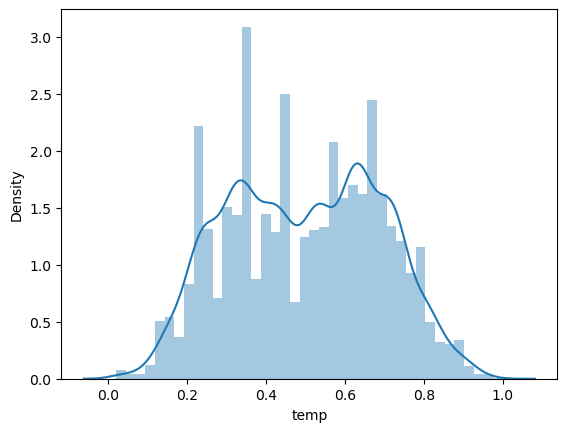

In [23]:
#Temperature
sns.distplot(dataset['temp'])

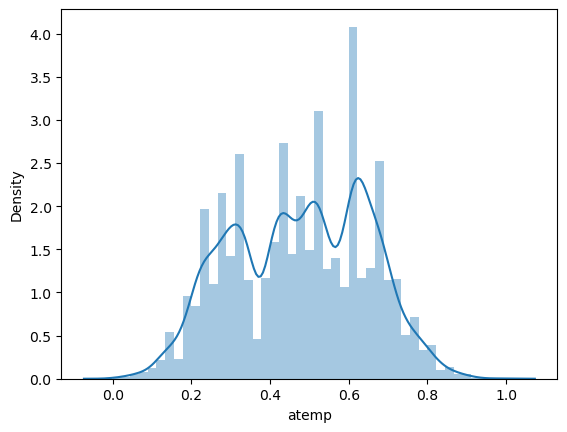

In [24]:
#Actual Temperature
sns.distplot(dataset['atemp'])
plt.show()

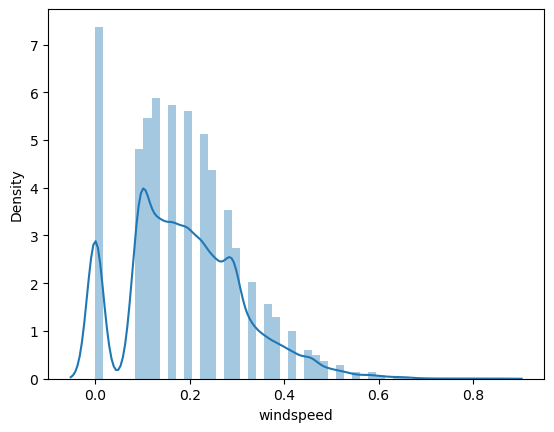

In [25]:
#wind speed
sns.distplot(dataset['windspeed'])
plt.show()

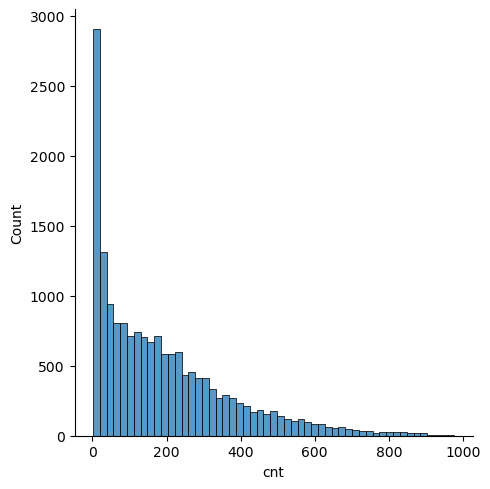

In [26]:
# Target Variable : count of total rental bikes including both casual and registered
sns.displot(dataset['cnt'])
plt.show()

In [27]:
#Converting date to datetime format
dataset['dteday'] = dataset['dteday'].astype('datetime64')

In [28]:
dataset_categorical = dataset.select_dtypes(exclude=['float64', 'datetime64', 'int64'])

In [29]:
dataset_categorical.columns

Index(['mnth', 'weekday', 'weathersit', 'seasons'], dtype='object')

In [30]:
dataset_categorical

,mnth,weekday,weathersit,seasons
0,Jan,sat,A,spring
1,Jan,sat,A,spring
2,Jan,sat,A,spring
3,Jan,sat,A,spring
4,Jan,sat,A,spring
...,...,...,...,...
17374,Dec,Mon,B,spring
17375,Dec,Mon,B,spring
17376,Dec,Mon,A,spring
17377,Dec,Mon,A,spring


<Axes: xlabel='holiday', ylabel='cnt'>

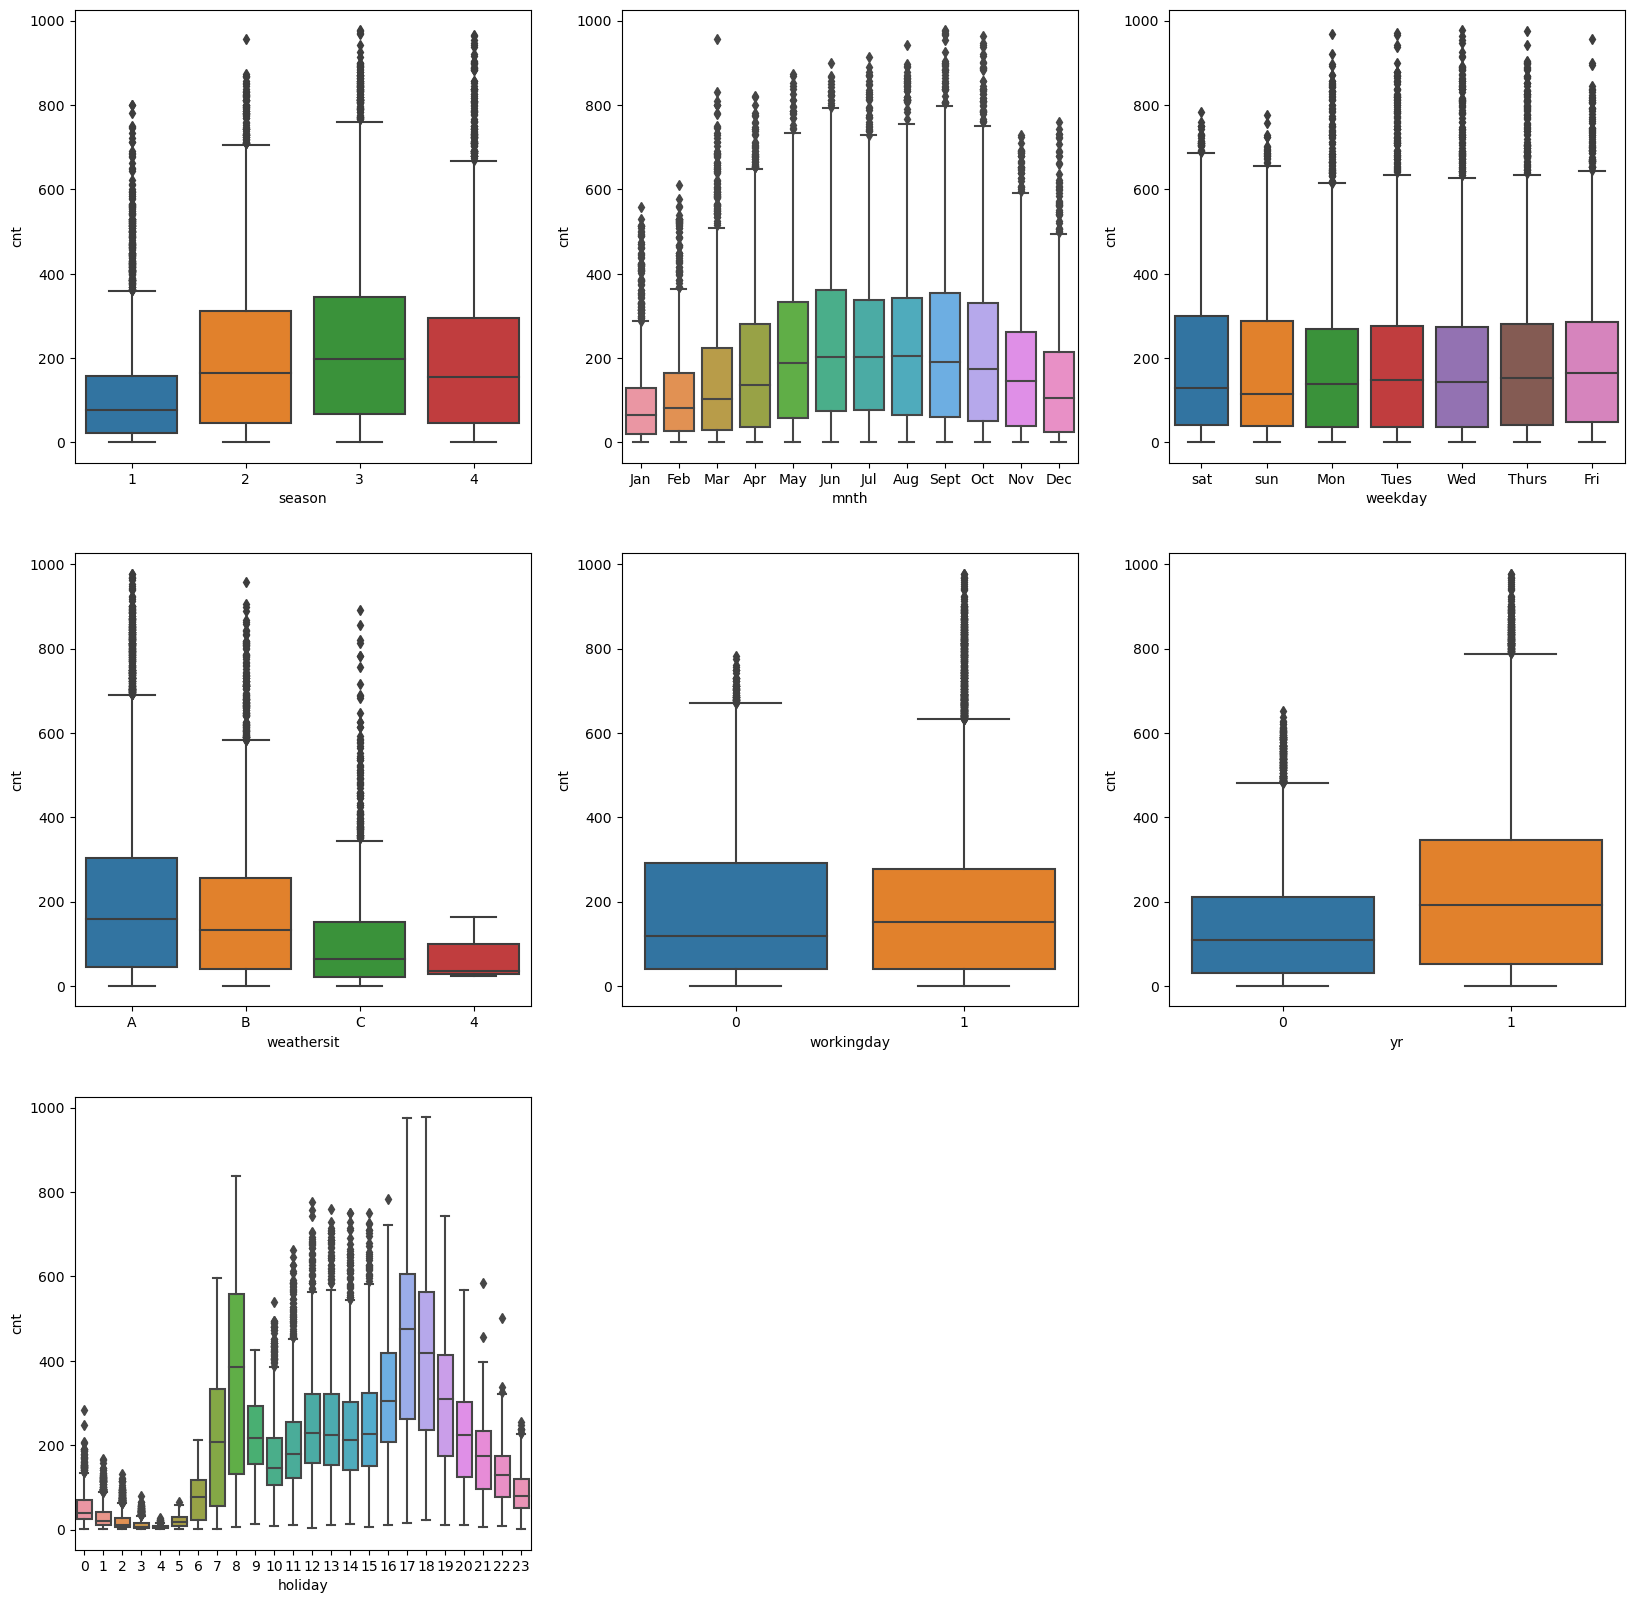

In [31]:
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.boxplot(x='season', y='cnt', data=dataset)
plt.subplot(3,3,2)
sns.boxplot(x='mnth', y='cnt', data=dataset)
plt.subplot(3,3,3)
sns.boxplot(x='weekday', y='cnt', data=dataset)
plt.subplot(3,3,4)
sns.boxplot(x='weathersit', y='cnt', data=dataset)
plt.subplot(3,3,5)
sns.boxplot(x='workingday', y='cnt', data=dataset)
plt.subplot(3,3,6)
sns.boxplot(x='yr', y='cnt', data=dataset)
plt.subplot(3,3,7)
sns.boxplot(x='holiday', y='cnt', data=dataset)

In [32]:
intVarlist = ["casual" , "registered" , "cnt"]

for var in intVarlist:
    dataset[var] = dataset[var].astype("float")

In [33]:
dataset_numeric = dataset.select_dtypes(include=['float64'])
dataset_numeric.head()

,temp,atemp,hum,windspeed,casual,registered,cnt
0,0.24,0.2879,0.81,0.0,3.0,13.0,16.0
1,0.22,0.2727,0.80,0.0,8.0,32.0,40.0
2,0.22,0.2727,0.80,0.0,5.0,27.0,32.0
3,0.24,0.2879,0.75,0.0,3.0,10.0,13.0
4,0.24,0.2879,0.75,0.0,0.0,1.0,1.0


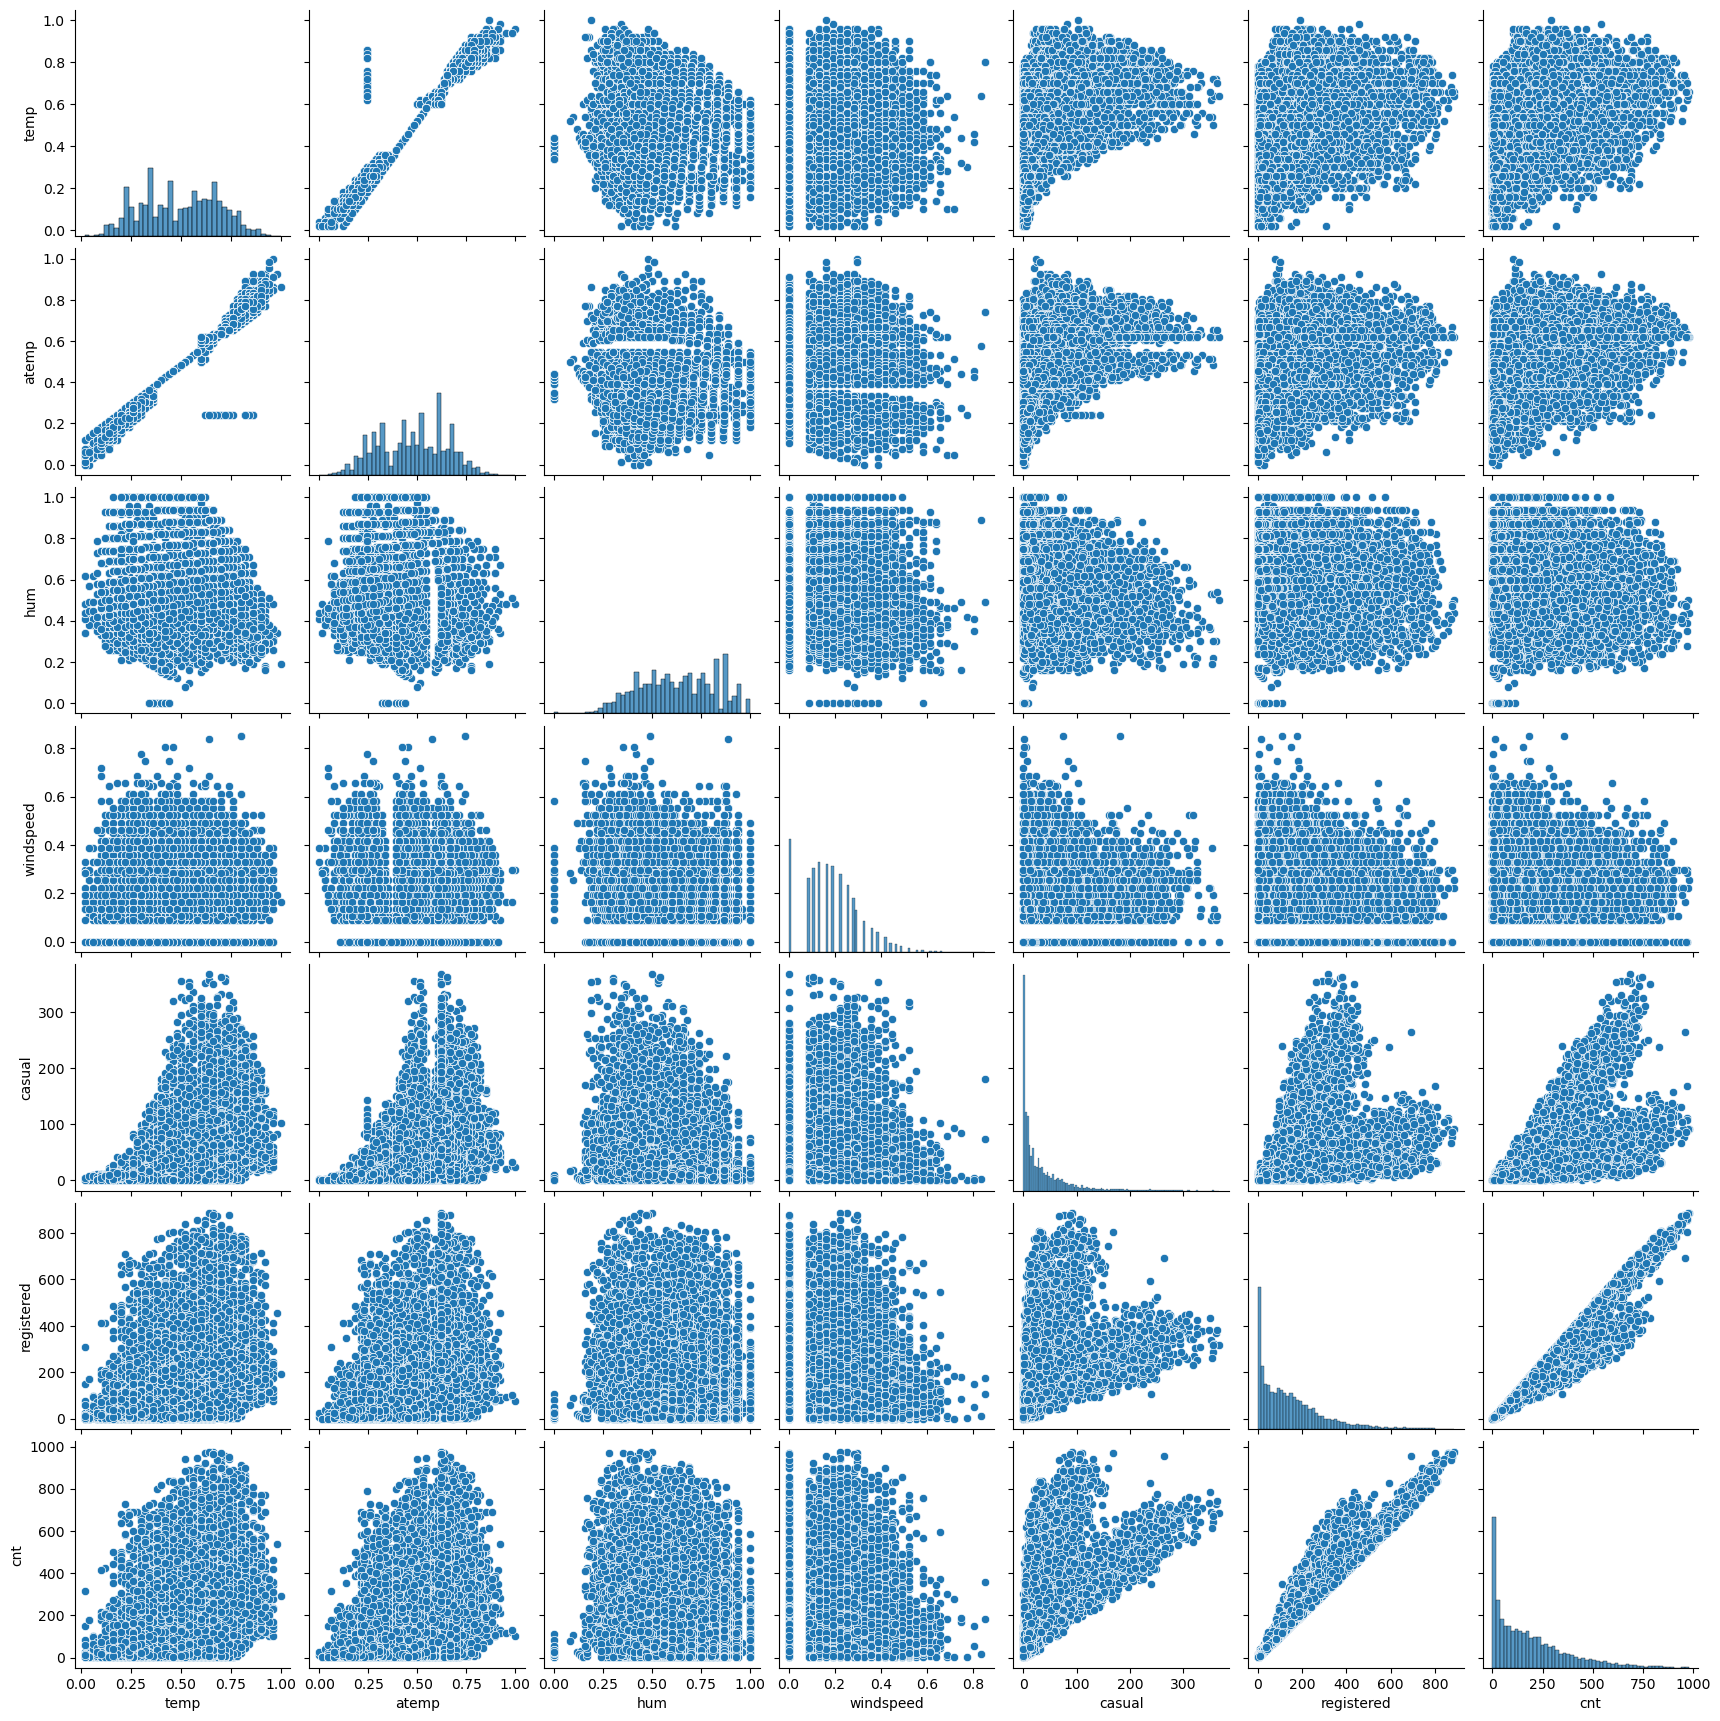

In [34]:
sns.pairplot(dataset_numeric)
plt.show()

In [35]:
cor = dataset_numeric.corr()
cor

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772
atemp,0.987672,1.000000,-0.051918,-0.062336,0.454080,0.332559,0.400929
hum,-0.069881,-0.051918,1.000000,-0.290105,-0.347028,-0.273933,-0.322911
windspeed,-0.023125,-0.062336,-0.290105,1.000000,0.090287,0.082321,0.093234
casual,0.459616,0.454080,-0.347028,0.090287,1.000000,0.506618,0.694564
registered,0.335361,0.332559,-0.273933,0.082321,0.506618,1.000000,0.972151
cnt,0.404772,0.400929,-0.322911,0.093234,0.694564,0.972151,1.000000


<Axes: >

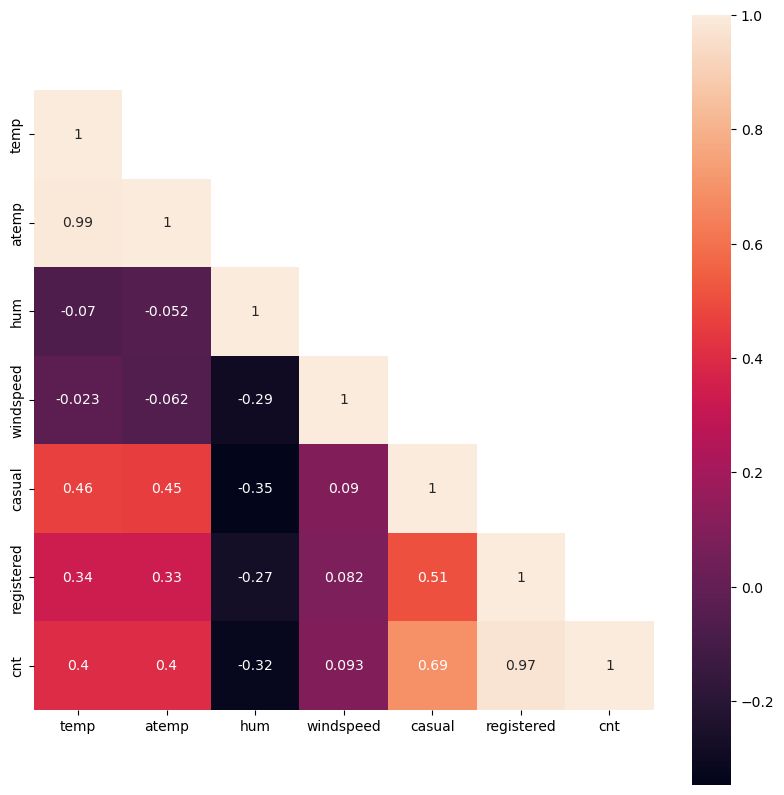

In [36]:
#heatmap
mask = np.array(cor)
mask[np.tril_indices_from(mask)]=False
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(cor,mask=mask, vmax=1, square=True, annot= True)

In [37]:
#Removing atemp as it is highly corealed with temp
dataset.drop('atemp', axis=1, inplace=True)

In [38]:
dataset.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt,seasons
0,1,2011-01-01,1,0,Jan,0,sat,0,A,0.24,0.81,0.0,3.0,13.0,16.0,spring
1,2,2011-01-01,1,0,Jan,1,sat,0,A,0.22,0.80,0.0,8.0,32.0,40.0,spring
2,3,2011-01-01,1,0,Jan,2,sat,0,A,0.22,0.80,0.0,5.0,27.0,32.0,spring
3,4,2011-01-01,1,0,Jan,3,sat,0,A,0.24,0.75,0.0,3.0,10.0,13.0,spring
4,5,2011-01-01,1,0,Jan,4,sat,0,A,0.24,0.75,0.0,0.0,1.0,1.0,spring


# 3.Data Preparation

In [39]:
dataset_categorical = dataset.select_dtypes(include=['object'])

In [40]:
dataset_categorical.head()

,mnth,weekday,weathersit,seasons
0,Jan,sat,A,spring
1,Jan,sat,A,spring
2,Jan,sat,A,spring
3,Jan,sat,A,spring
4,Jan,sat,A,spring


In [41]:
dataset_dummies = pd.get_dummies(dataset_categorical,drop_first = True, dtype = "int")
dataset_dummies.head()

,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,...,weekday_Tues,weekday_Wed,weekday_sat,weekday_sun,weathersit_A,weathersit_B,weathersit_C,seasons_spring,seasons_summer,seasons_winter
0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0


In [42]:
#Drop catergorical variables with the dataset
dataset = dataset.drop(list(dataset_categorical.columns), axis=1)
dataset

,instant,dteday,season,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,0,0,0.24,0.81,0.0000,3.0,13.0,16.0
1,2,2011-01-01,1,0,1,0,0.22,0.80,0.0000,8.0,32.0,40.0
2,3,2011-01-01,1,0,2,0,0.22,0.80,0.0000,5.0,27.0,32.0
3,4,2011-01-01,1,0,3,0,0.24,0.75,0.0000,3.0,10.0,13.0
4,5,2011-01-01,1,0,4,0,0.24,0.75,0.0000,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,19,1,0.26,0.60,0.1642,11.0,108.0,119.0
17375,17376,2012-12-31,1,1,20,1,0.26,0.60,0.1642,8.0,81.0,89.0
17376,17377,2012-12-31,1,1,21,1,0.26,0.60,0.1642,7.0,83.0,90.0
17377,17378,2012-12-31,1,1,22,1,0.26,0.56,0.1343,13.0,48.0,61.0


In [43]:
#Cancatenate dummy variables with the dataset
dataset = pd.concat([dataset, dataset_dummies], axis=1)

In [44]:
dataset.head()

,instant,dteday,season,yr,holiday,workingday,temp,hum,windspeed,casual,...,weekday_Tues,weekday_Wed,weekday_sat,weekday_sun,weathersit_A,weathersit_B,weathersit_C,seasons_spring,seasons_summer,seasons_winter
0,1,2011-01-01,1,0,0,0,0.24,0.81,0.0,3.0,...,0,0,1,0,1,0,0,1,0,0
1,2,2011-01-01,1,0,1,0,0.22,0.80,0.0,8.0,...,0,0,1,0,1,0,0,1,0,0
2,3,2011-01-01,1,0,2,0,0.22,0.80,0.0,5.0,...,0,0,1,0,1,0,0,1,0,0
3,4,2011-01-01,1,0,3,0,0.24,0.75,0.0,3.0,...,0,0,1,0,1,0,0,1,0,0
4,5,2011-01-01,1,0,4,0,0.24,0.75,0.0,0.0,...,0,0,1,0,1,0,0,1,0,0


In [45]:
dataset = dataset.drop(['instant','dteday'],axis=1, inplace=False)
dataset.head()

,season,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,...,weekday_Tues,weekday_Wed,weekday_sat,weekday_sun,weathersit_A,weathersit_B,weathersit_C,seasons_spring,seasons_summer,seasons_winter
0,1,0,0,0,0.24,0.81,0.0,3.0,13.0,16.0,...,0,0,1,0,1,0,0,1,0,0
1,1,0,1,0,0.22,0.80,0.0,8.0,32.0,40.0,...,0,0,1,0,1,0,0,1,0,0
2,1,0,2,0,0.22,0.80,0.0,5.0,27.0,32.0,...,0,0,1,0,1,0,0,1,0,0
3,1,0,3,0,0.24,0.75,0.0,3.0,10.0,13.0,...,0,0,1,0,1,0,0,1,0,0
4,1,0,4,0,0.24,0.75,0.0,0.0,1.0,1.0,...,0,0,1,0,1,0,0,1,0,0


# 4.Model Building and Evaluation

In [46]:
#Import libs
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [47]:
#Split the dataframe into train and test datasets
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(dataset, train_size = 0.7, test_size=0.3, random_state=100)

In [48]:
df_train

,season,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,...,weekday_Tues,weekday_Wed,weekday_sat,weekday_sun,weathersit_A,weathersit_B,weathersit_C,seasons_spring,seasons_summer,seasons_winter
8364,4,0,4,1,0.36,0.53,0.1045,0.0,4.0,4.0,...,1,0,0,0,0,1,0,0,0,1
643,1,0,2,0,0.16,0.80,0.0000,1.0,10.0,11.0,...,0,0,0,1,1,0,0,1,0,0
9518,1,1,13,1,0.38,0.40,0.2239,17.0,124.0,141.0,...,0,0,0,0,1,0,0,1,0,0
7233,4,0,0,1,0.36,0.76,0.0896,3.0,28.0,31.0,...,0,0,0,0,1,0,0,0,0,1
7443,4,0,18,0,0.34,0.39,0.2537,23.0,185.0,208.0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16304,4,1,2,0,0.26,0.65,0.1940,8.0,41.0,49.0,...,0,0,1,0,1,0,0,0,0,1
79,1,0,11,1,0.22,0.51,0.2985,7.0,50.0,57.0,...,1,0,0,0,1,0,0,1,0,0
12119,2,1,4,1,0.62,0.88,0.0000,3.0,6.0,9.0,...,0,0,0,0,0,1,0,0,1,0
14147,3,1,16,1,0.84,0.32,0.4478,116.0,372.0,488.0,...,0,0,0,0,0,1,0,0,0,0


In [49]:
from sklearn.preprocessing import MinMaxScaler

In [50]:
scaler = MinMaxScaler()

In [51]:
#Apply scaler to all columns except dummy variables
var = ["temp", "hum", "windspeed", "casual", "registered", "cnt"]

df_train[var] = scaler.fit_transform(df_train[var])

In [52]:
df_train.describe()

,season,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,...,weekday_Tues,weekday_Wed,weekday_sat,weekday_sun,weathersit_A,weathersit_B,weathersit_C,seasons_spring,seasons_summer,seasons_winter
count,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,...,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000
mean,2.510645,0.500781,11.562433,0.681134,0.499187,0.627601,0.222199,0.100035,0.174140,0.194161,...,0.142129,0.140732,0.145417,0.144677,0.655158,0.263872,0.080723,0.239704,0.254501,0.244554
std,1.103858,0.500020,6.902286,0.466056,0.200417,0.193206,0.142875,0.138109,0.170584,0.186013,...,0.349197,0.347759,0.352535,0.351790,0.475336,0.440749,0.272421,0.426920,0.435598,0.429840
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,6.000000,0.000000,0.333333,0.480000,0.122840,0.011050,0.038375,0.039959,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,1.000000,12.000000,1.000000,0.500000,0.630000,0.228047,0.046961,0.130926,0.145492,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,1.000000,18.000000,1.000000,0.666667,0.780000,0.298225,0.135359,0.250564,0.288934,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,4.000000,1.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


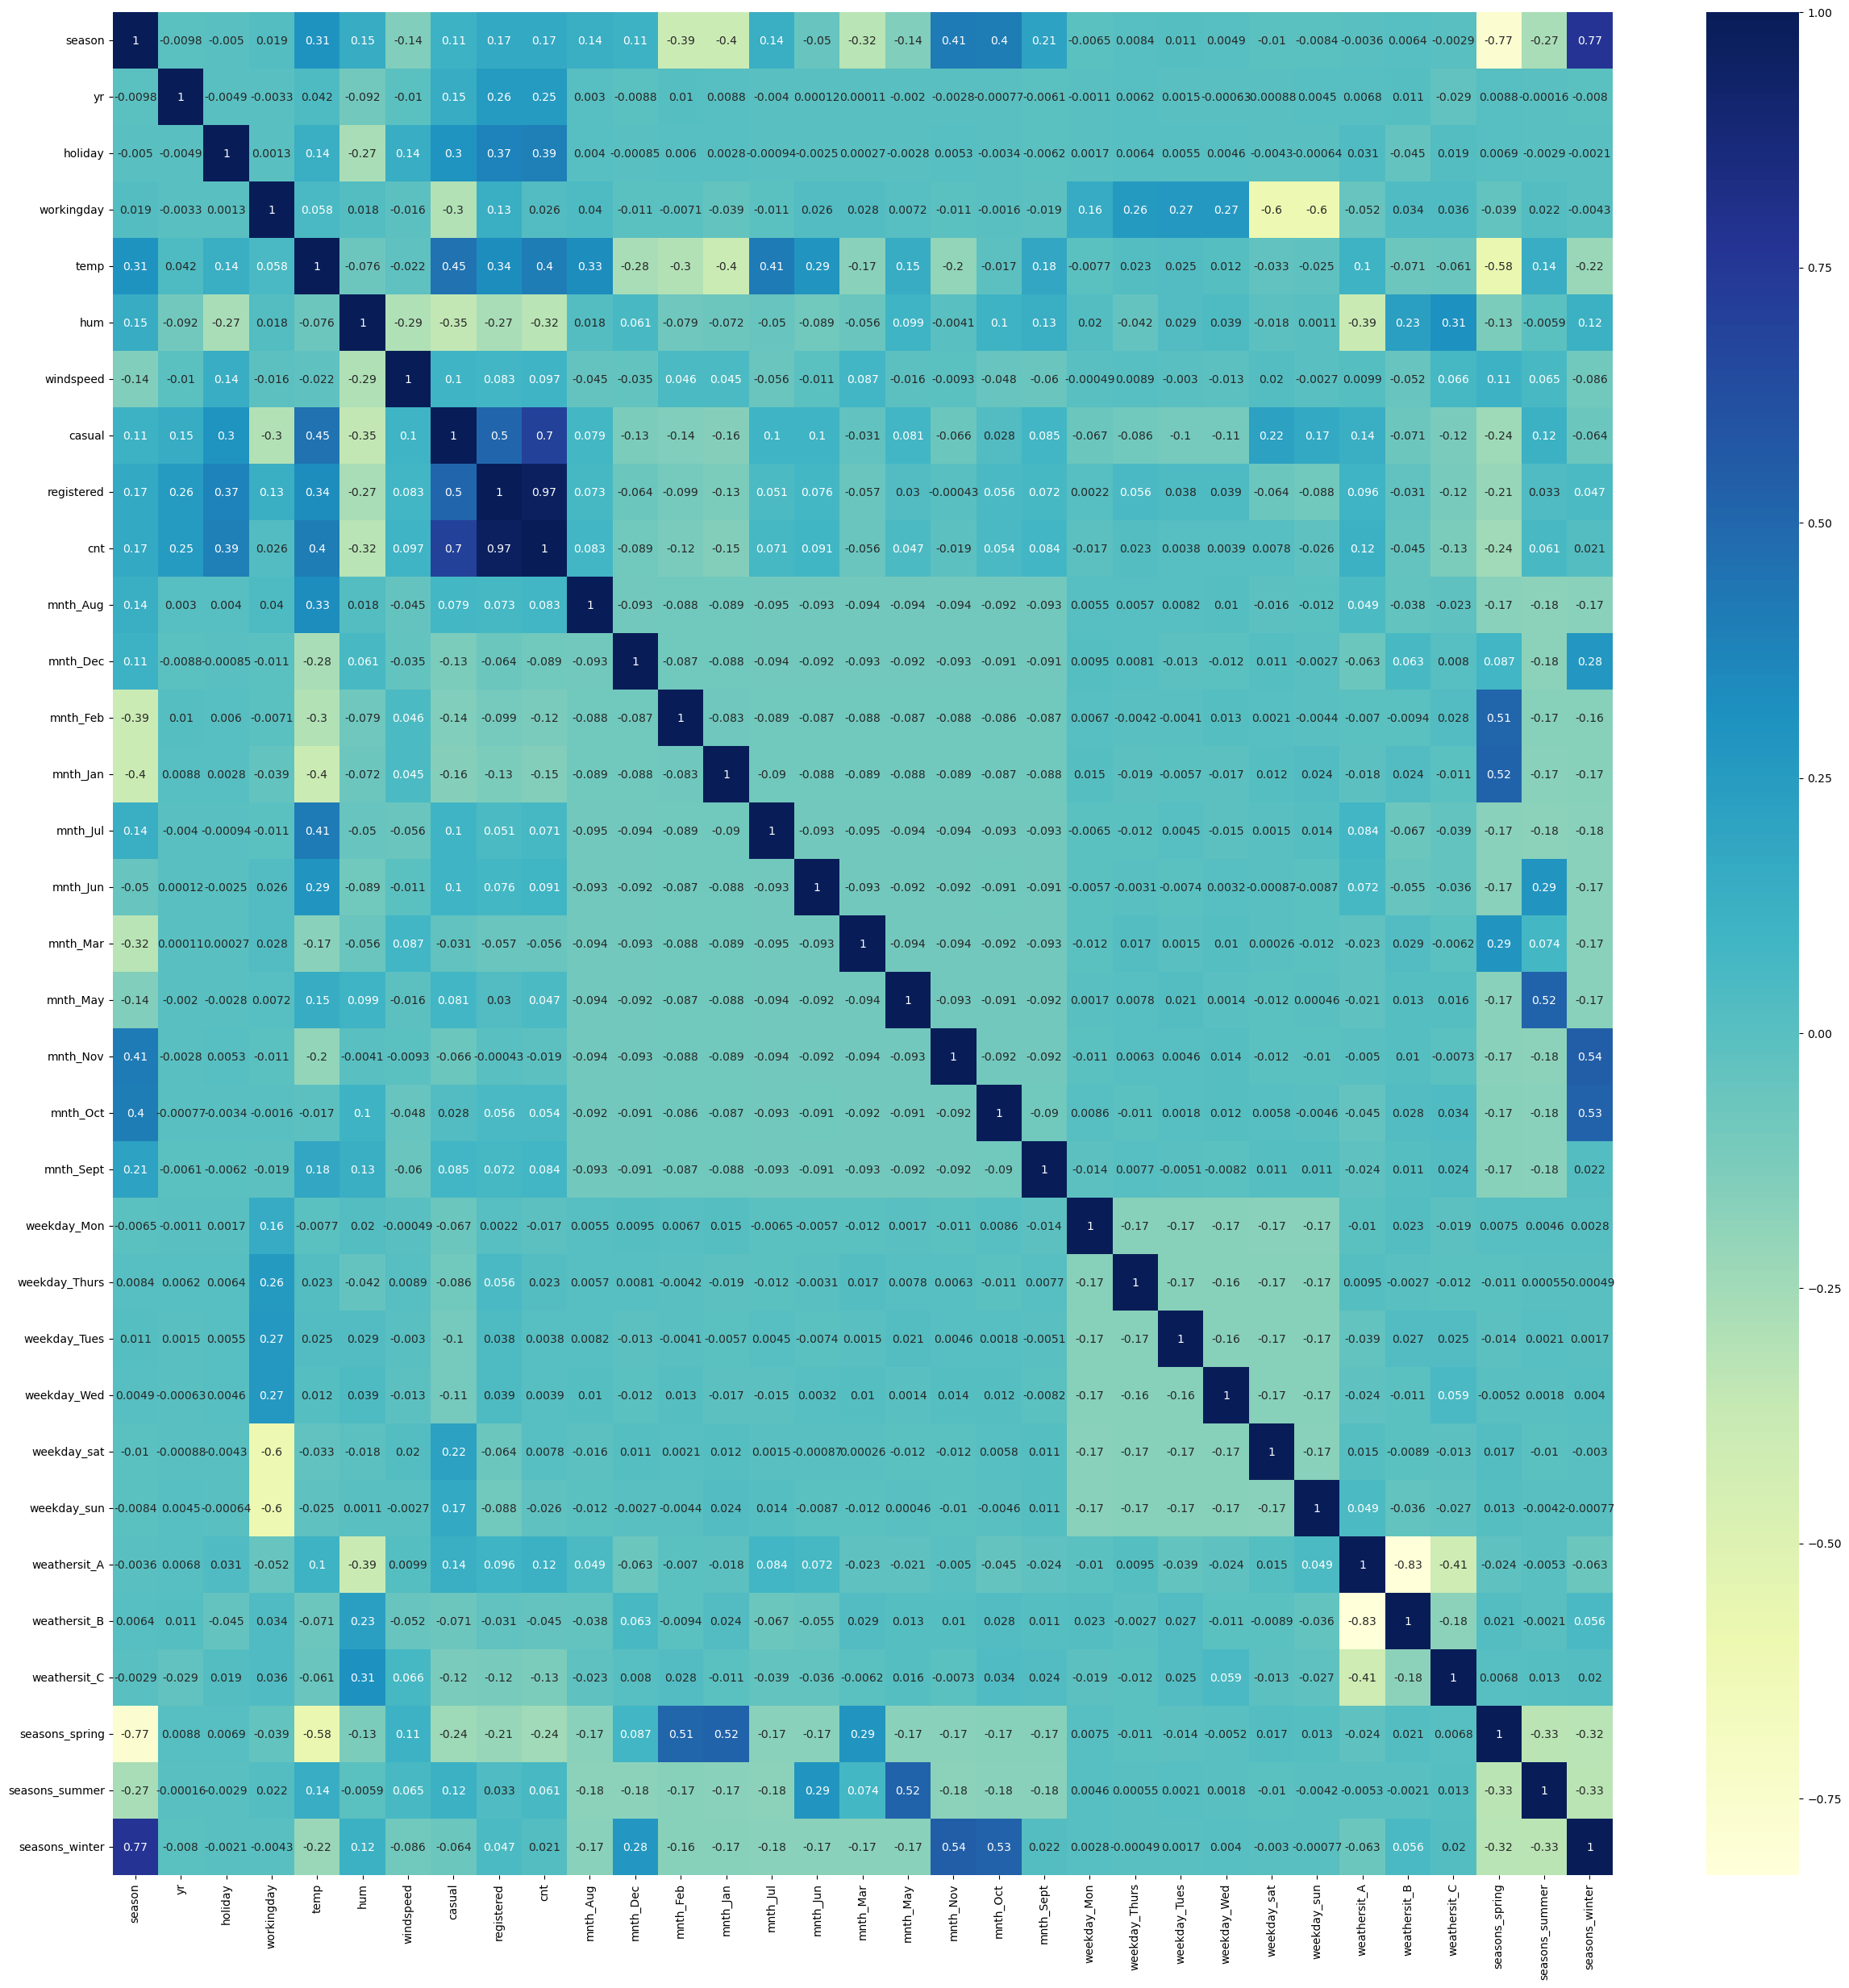

In [53]:
#Checking the coreelation coefficients to see which variables are highly corelated
plt.figure(figsize=(30,30))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [54]:
#Diving into x and y
x_train = df_train.drop(["casual", "registered"], axis=1)
y_train = df_train.pop('cnt')

In [55]:
x_train.head()

,season,yr,holiday,workingday,temp,hum,windspeed,cnt,mnth_Aug,mnth_Dec,...,weekday_Tues,weekday_Wed,weekday_sat,weekday_sun,weathersit_A,weathersit_B,weathersit_C,seasons_spring,seasons_summer,seasons_winter
8364,4,0,4,1,0.354167,0.53,0.122840,0.003074,0,1,...,1,0,0,0,0,1,0,0,0,1
643,1,0,2,0,0.145833,0.80,0.000000,0.010246,0,0,...,0,0,0,1,1,0,0,1,0,0
9518,1,1,13,1,0.375000,0.40,0.263195,0.143443,0,0,...,0,0,0,0,1,0,0,1,0,0
7233,4,0,0,1,0.354167,0.76,0.105325,0.030738,0,0,...,0,0,0,0,1,0,0,0,0,1
7443,4,0,18,0,0.333333,0.39,0.298225,0.212090,0,0,...,0,0,0,0,1,0,0,0,0,1


In [56]:
#np.array(x_train)

In [57]:
import statsmodels.api as sm
x_train_lm = sm.add_constant(x_train)

lr = sm.OLS(y_train, x_train_lm).fit()

In [58]:
lr.params

const            -1.080733e-15
season           -6.429319e-16
yr                2.567391e-16
holiday          -4.732542e-17
workingday        3.903128e-18
temp              6.591949e-17
hum               1.786765e-16
windspeed         4.423545e-17
cnt               1.000000e+00
mnth_Aug          1.656661e-16
mnth_Dec         -1.275022e-16
mnth_Feb         -1.314053e-16
mnth_Jan         -1.075529e-16
mnth_Jul          3.642919e-17
mnth_Jun         -2.931683e-16
mnth_Mar          1.179612e-16
mnth_May          3.295975e-17
mnth_Nov          1.608956e-16
mnth_Oct          3.608225e-16
mnth_Sept         5.061056e-16
weekday_Mon       8.066464e-17
weekday_Thurs    -2.428613e-17
weekday_Tues      2.688821e-17
weekday_Wed       2.081668e-17
weekday_sat       2.081668e-16
weekday_sun       2.844947e-16
weathersit_A      2.588207e-15
weathersit_B      2.494532e-15
weathersit_C      2.456368e-15
seasons_spring   -1.021752e-15
seasons_summer   -3.573530e-16
seasons_winter    4.076600e-16
dtype: f

In [59]:
lm = LinearRegression()

lm.fit(x_train, y_train)

LinearRegression()

In [60]:
print(lm.coef_)
print(lm.intercept_)

[-5.73952194e-17  5.26874932e-17  3.16969233e-17 -1.89347987e-16
  6.15976272e-17  1.44144452e-16 -6.54953944e-16  1.00000000e+00
  9.52025105e-18 -4.56367486e-16 -7.53712035e-18 -5.56295354e-16
 -3.15008203e-16 -8.46182457e-17  6.22813196e-17  1.51469339e-16
 -2.17753919e-16 -5.32979546e-16 -2.64285676e-16 -3.13940690e-16
 -1.18102113e-16 -1.48982158e-16  1.87536021e-16 -7.79295349e-18
 -5.69212019e-17 -1.96246455e-16 -1.66921587e-16 -3.21916338e-16
  1.97747603e-16 -1.00143564e-16  1.46087902e-16]
3.0531133177191805e-16


In [61]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.658e+31
Date:                Mon, 28 Aug 2023   Prob (F-statistic):               0.00
Time:                        13:44:11   Log-Likelihood:             4.0875e+05
No. Observations:               12165   AIC:                        -8.174e+05
Df Residuals:                   12134   BIC:                        -8.172e+05
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.081e-15    1.6e-16     -6.769      0.000   -1.39e-15   -7.68e-16
season         -6.429e-16   6.95e-17     -9.255      0.000   -7.79e-16   -5.07e-16
yr              2.567e-16   1.18e-17     21.794      0.000    2.34e-16     2.8e-16
holiday        -4.733e-17   9.28e-19    -51.004      0.000   -4.91e-17   -4.55e-17
workingday      3.903e-18   3.55e-17      0.110      0.912   -6.56e-17    7.34e-17
temp            6.592e-17   6.28e-17      1.049      0.294   -5.72e-17    1.89e-16
hum             1.787e-16    3.8e-17      4.708      0.000    1.04e-16    2.53e-16
windspeed       4.424e-17   4.25e-17      1.041      0.298   -3.91e-17    1.28e-16
cnt                1.0000   3.92e-17   2.55e+16      0.000       1.000       1.000
mnth_Aug        1.657e-16   4.66e-17      3.552      0.000    7.42e-17    2.57e-16
mnth_Dec       -1.275e-16   4.62e-17     -2.761      0.006   -2.18e-16    -3.7e-17
mnth_Feb       -1.314e-16   4.63e-17     -2.837      0.005   -2.22e-16   -4.06e-17
mnth_Jan       -1.076e-16   4.73e-17     -2.273      0.023      -2e-16   -1.48e-17
mnth_Jul        3.643e-17   4.74e-17      0.768      0.442   -5.65e-17    1.29e-16
mnth_Jun       -2.932e-16   3.26e-17     -9.002      0.000   -3.57e-16   -2.29e-16
mnth_Mar         1.18e-16   3.58e-17      3.295      0.001    4.78e-17    1.88e-16
mnth_May        3.296e-17    2.9e-17      1.135      0.256   -2.39e-17    8.99e-17
mnth_Nov        1.609e-16   5.05e-17      3.183      0.001    6.18e-17     2.6e-16
mnth_Oct        3.608e-16      5e-17      7.219      0.000    2.63e-16    4.59e-16
mnth_Sept       5.061e-16   4.43e-17     11.431      0.000    4.19e-16    5.93e-16
weekday_Mon     8.066e-17   2.15e-17      3.758      0.000    3.86e-17    1.23e-16
weekday_Thurs  -2.429e-17   2.12e-17     -1.146      0.252   -6.58e-17    1.73e-17
weekday_Tues    2.689e-17   2.12e-17      1.270      0.204   -1.46e-17    6.84e-17
weekday_Wed     2.082e-17   2.12e-17      0.980      0.327   -2.08e-17    6.25e-17
weekday_sat     2.082e-16   4.06e-17      5.126      0.000    1.29e-16    2.88e-16
weekday_sun     2.845e-16   4.06e-17      7.003      0.000    2.05e-16    3.64e-16
weathersit_A    2.588e-15   3.58e-16      7.221      0.000    1.89e-15    3.29e-15
weathersit_B    2.495e-15   3.58e-16      6.960      0.000    1.79e-15     3.2e-15
weathersit_C    2.456e-15   3.59e-16      6.848      0.000    1.75e-15    3.16e-15
seasons_spring -1.022e-15   1.39e-16     -7.344      0.000   -1.29e-15   -7.49e-16
seasons_summer -3.574e-16   7.26e-17     -4.920      0.000      -5e-16   -2.15e-16
seasons_winter  4.077e-16   8.07e-17      5.055      0.000     2.5e-16    5.66e-16
==============================================================================
Omnibus:                       47.560   Durbin-Watson:                   0.948
Prob(Omnibus):      

In [62]:
#import_rfe
from sklearn.feature_selection import RFE

In [63]:
lm = LinearRegression()
rfe1 = RFE(lm, n_features_to_select=15)

#fit with 15 feature
rfe1.fit(x_train, y_train)
print(rfe1.support_)
print(rfe1.ranking_)

[ True  True False False False  True False  True  True  True False False
  True False False False False  True  True False False  True  True False
 False False False  True  True  True  True]
[ 1  1 10 14  2  1 15  1  1  1 17  4  1  6 13 16  3  1  1  7  8  1  1  9
 11  5 12  1  1  1  1]


In [64]:
col1 = x_train.columns[rfe1.support_]

In [65]:
col1

Index(['season', 'yr', 'hum', 'cnt', 'mnth_Aug', 'mnth_Dec', 'mnth_Jul',
       'mnth_Oct', 'mnth_Sept', 'weekday_Tues', 'weekday_Wed', 'weathersit_C',
       'seasons_spring', 'seasons_summer', 'seasons_winter'],
      dtype='object')

In [66]:

x_train_rfe1 = x_train [col1]

x_train_rfe1 = sm.add_constant(x_train_rfe1)
lm1 = sm.OLS(y_train, x_train_rfe1).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.285e+31
Date:                Mon, 28 Aug 2023   Prob (F-statistic):               0.00
Time:                        13:44:12   Log-Likelihood:             4.0634e+05
No. Observations:               12165   AIC:                        -8.127e+05
Df Residuals:                   12150   BIC:                        -8.125e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2.439e-17   1.35e-17      1.805      0.071    -2.1e-18    5.09e-17
season         -1.175e-16   1.23e-17     -9.550      0.000   -1.42e-16   -9.34e-17
yr              -2.06e-16   1.42e-17    -14.519      0.000   -2.34e-16   -1.78e-16
hum             2.593e-16    4.1e-17      6.319      0.000    1.79e-16     3.4e-16
cnt                1.0000   4.26e-17   2.35e+16      0.000       1.000       1.000
mnth_Aug       -7.876e-16   4.09e-17    -19.267      0.000   -8.68e-16   -7.07e-16
mnth_Dec       -5.638e-17   2.78e-17     -2.028      0.043   -1.11e-16   -1.88e-18
mnth_Jul       -6.679e-16   4.07e-17    -16.398      0.000   -7.48e-16   -5.88e-16
mnth_Oct       -3.756e-16   3.15e-17    -11.914      0.000   -4.37e-16   -3.14e-16
mnth_Sept      -3.942e-16   3.57e-17    -11.034      0.000   -4.64e-16   -3.24e-16
weekday_Tues    2.092e-16   1.99e-17     10.520      0.000     1.7e-16    2.48e-16
weekday_Wed     2.225e-16      2e-17     11.123      0.000    1.83e-16    2.62e-16
weathersit_C    7.589e-17   2.65e-17      2.861      0.004    2.39e-17    1.28e-16
seasons_spring -1.288e-16   1.87e-17     -6.890      0.000   -1.65e-16   -9.22e-17
seasons_summer -2.923e-16   2.71e-17    -10.776      0.000   -3.45e-16   -2.39e-16
seasons_winter -1.665e-16   4.41e-17     -3.775      0.000   -2.53e-16   -8.01e-17
==============================================================================
Omnibus:                      382.800   Durbin-Watson:                   0.585
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              285.896
Skew:                           0.282   Prob(JB):                     8.29e-63
Kurtosis:                       2.504   Cond. No.                     9.01e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.39e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [68]:
a = x_train_rfe1.drop('const', axis = 1)

In [69]:
#Evaluating VIFs
vif = pd.DataFrame()
vif['features'] = a.columns
vif['VIF'] = [variance_inflation_factor(a.values,i)for i in range (a.shape[1])]
vif['VIF']  = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
0,season,34.55
14,seasons_winter,10.82
13,seasons_summer,4.37
12,seasons_spring,3.09
4,mnth_Aug,2.82
6,mnth_Jul,2.82
8,mnth_Sept,2.08
7,mnth_Oct,1.61
2,hum,1.34
3,cnt,1.34


In [70]:

lm = LinearRegression()
rfe2 = RFE(lm, n_features_to_select=7)

#fit with 15 feature
rfe2.fit(x_train, y_train)
print(rfe2.support_)
print(rfe2.ranking_)

[ True False False False False False False  True  True False False False
 False False False False False False False False False  True False False
 False False False False  True  True  True]
[ 1  5 18 22 10  2 23  1  1  3 25 12  6 14 21 24 11  8  4 15 16  1  9 17
 19 13 20  7  1  1  1]


In [71]:
col2 = x_train.columns[rfe2.support_]

x_train_rfe2 = x_train[col2]

x_train_rfe2 = sm.add_constant(x_train_rfe2)
lm2 = sm.OLS(y_train, x_train_rfe2).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.979e+32
Date:                Mon, 28 Aug 2023   Prob (F-statistic):               0.00
Time:                        13:44:12   Log-Likelihood:             4.1170e+05
No. Observations:               12165   AIC:                        -8.234e+05
Df Residuals:                   12158   BIC:                        -8.233e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.808e-16   4.47e-18     40.475      0.000    1.72e-16     1.9e-16
season          3.103e-16   3.87e-18     80.118      0.000    3.03e-16    3.18e-16
cnt                1.0000   2.45e-17   4.09e+16      0.000       1.000       1.000
mnth_Aug       -5.881e-16   1.83e-17    -32.134      0.000   -6.24e-16   -5.52e-16
weekday_Tues   -1.991e-16   1.26e-17    -15.802      0.000   -2.24e-16   -1.74e-16
seasons_spring -2.134e-16   7.98e-18    -26.722      0.000   -2.29e-16   -1.98e-16
seasons_summer -8.576e-17    1.1e-17     -7.782      0.000   -1.07e-16   -6.42e-17
seasons_winter -7.965e-16   1.64e-17    -48.650      0.000   -8.29e-16   -7.64e-16
==============================================================================
Omnibus:                      754.149   Durbin-Watson:                   1.716
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              956.280
Skew:                           0.594   Prob(JB):                    2.22e-208
Kurtosis:                       3.691   Cond. No.                     8.81e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.35e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [72]:
b = x_train_rfe2.drop('const', axis = 1)
vif1 = pd.DataFrame()
vif1['features'] = b.columns
vif1['VIF'] = [variance_inflation_factor(b.values,i) for i in range(b.shape[1])]
vif1['VIF'] = round(vif1 ['VIF'],2)
vif1 = vif1.sort_values(by = "VIF", ascending = False)
vif1

,features,VIF
0,season,6.43
6,seasons_winter,3.60
5,seasons_summer,1.67
2,mnth_Aug,1.36
4,seasons_spring,1.17
1,cnt,1.07
3,weekday_Tues,1.00


In [73]:
y_train_cnt = lm2.predict(x_train_rfe2)

<Axes: ylabel='Density'>

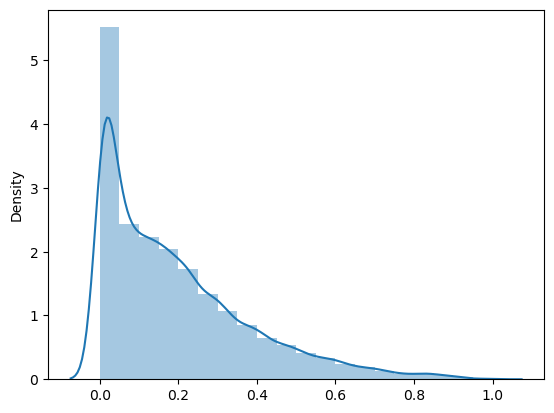

In [74]:
fig = plt.figure()
sns.distplot((y_train, y_train_cnt), bins=20)

In [75]:
df_test[var] = scaler.transform(df_test[var])
df_test

,season,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,...,weekday_Tues,weekday_Wed,weekday_sat,weekday_sun,weathersit_A,weathersit_B,weathersit_C,seasons_spring,seasons_summer,seasons_winter
6052,3,0,18,1,0.729167,0.62,0.193018,0.229282,0.567720,0.599385,...,0,1,0,0,1,0,0,0,0,0
6250,4,0,0,1,0.625000,0.94,0.105325,0.030387,0.046275,0.052254,...,0,0,0,0,0,1,0,0,0,1
8110,4,0,14,1,0.375000,0.46,0.333373,0.066298,0.183973,0.190574,...,0,0,0,0,1,0,0,0,0,1
7604,4,0,11,1,0.291667,0.36,0.157870,0.049724,0.137698,0.142418,...,0,0,0,0,1,0,0,0,0,1
6356,4,0,10,1,0.645833,0.94,0.193018,0.058011,0.113995,0.123975,...,1,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6309,4,0,11,0,0.666667,0.78,0.157870,0.361878,0.259594,0.368852,...,0,0,0,1,0,1,0,0,0,1
10237,1,1,15,1,0.541667,0.37,0.526390,0.121547,0.186230,0.213115,...,0,1,0,0,1,0,0,1,0,0
904,1,0,5,1,0.104167,0.50,0.263195,0.000000,0.006772,0.005123,...,0,0,0,0,0,1,0,1,0,0
11693,2,1,10,1,0.520833,0.77,0.228047,0.171271,0.144470,0.193648,...,0,0,0,0,0,1,0,0,1,0


In [76]:
y_test = df_test.pop('cnt')
x_test = df_test.drop(["casual", "registered"], axis=1)

In [77]:
x_test.head()

,season,yr,holiday,workingday,temp,hum,windspeed,mnth_Aug,mnth_Dec,mnth_Feb,...,weekday_Tues,weekday_Wed,weekday_sat,weekday_sun,weathersit_A,weathersit_B,weathersit_C,seasons_spring,seasons_summer,seasons_winter
6052,3,0,18,1,0.729167,0.62,0.193018,0,0,0,...,0,1,0,0,1,0,0,0,0,0
6250,4,0,0,1,0.625000,0.94,0.105325,0,0,0,...,0,0,0,0,0,1,0,0,0,1
8110,4,0,14,1,0.375000,0.46,0.333373,0,1,0,...,0,0,0,0,1,0,0,0,0,1
7604,4,0,11,1,0.291667,0.36,0.157870,0,0,0,...,0,0,0,0,1,0,0,0,0,1
6356,4,0,10,1,0.645833,0.94,0.193018,0,0,0,...,1,0,0,0,0,0,1,0,0,1


In [78]:
c = x_train_rfe2.drop('const',axis=1)

In [79]:
col2 = c.columns

In [80]:
x_test_rfe2 = x_test[col2]

KeyError: "['cnt'] not in index"

In [ ]:
x_test_rfe2 = sm.add_constant(x_train_rfe2)

In [ ]:
x_test_rfe2.info()

In [ ]:
y_pred = lm2.predict(x_test_rfe2)

In [ ]:
plt.figure()
plt.scatter(y_test, y_pred)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

In [ ]:
plt.figure(figsize=(8,5))

sns.heatmap(dataset[col2], cmap = "YlGnBu", annot=True)
plt.show

In [ ]:
plt.figure(figsize=(8,5))

sns.heatmap(dataset[col2].corr(), cmap = "YlGnBu", annot=True)